In [1]:
import sys, os
sys.path.append(os.path.abspath('../../..')) 
from models.clusters.product_analyzer import save_report, cluster_categories, get_top_products_by_category
from utils.dataframe import load_and_clean_data
from models.classifiers.classifier_model import run_complete_pipeline


[STEP 1/4] Loading and cleaning data...
Processing DataFrame from '1429_1.csv'...
Finished processing '1429_1.csv'. Found 34660 rows.
Processing DataFrame from 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv'...
Finished processing 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv'. Found 5000 rows.
Processing DataFrame from 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'...
Finished processing 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'. Found 28332 rows.

Merging all datasets...
Total rows after merge: 67992
Filled 1636 product names based on ID.
Filled remaining 5124 NA names with 'Unknown Product'.
Dropped 2153 duplicate reviews.
Dropped 53 rows due to missing (MUST HAVE) data.
Final merged dataset has 65786 rows.

[STEP 2/4] Running sentiment analysis pipeline...

STARTING COMPLETE PIPELINE
PART 1: DATA PREPARATION

Dataset shape: (65786, 16)

Sentiment distribution:
sentiment
positive    60478
neutral      2839
negative

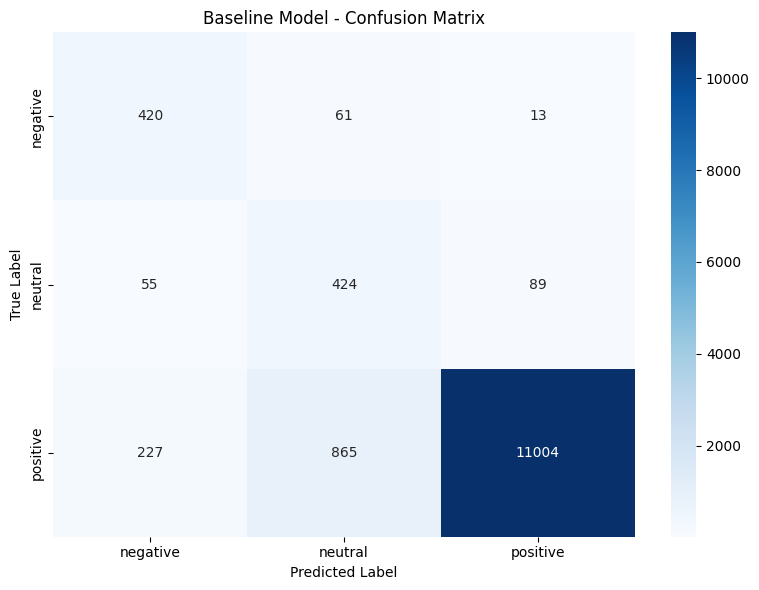


PART 4: PREDICTING ON FULL DATASET

Using Baseline Model for predictions...

Predictions complete!
Predicted sentiment distribution:
predicted_sentiment
positive    55565
neutral      6710
negative     3511
Name: count, dtype: int64

Saved full predictions to: ../../../results/sentiment_analysis_linear_regression.csv

PIPELINE COMPLETE!

[STEP 3/4] Executing product clustering...

--- Starting Product Clustering with k=4 ---
Clustering based on 89 unique products (vs. 65786 reviews).
Using the column: categories
Generating features with TfidfVectorizer...
Feature Matrix Shape: (89, 465)
Reducing dimensionality with PCA to 50 components...
Applying K-Means clustering...
Cluster Distribution:
cluster_id
0    33
1    11
2    25
3    20
Name: count, dtype: int64

--- Evaluating Cluster Quality Metrics ---
  - Silhouette Score: 0.1806
    (Interpretation: Close to +1 is great, 0 is overlapping, negative is bad)
  - Davies-Bouldin Index: 2.1828
    (Interpretation: Closer to 0 is better. Me

In [2]:
# Assuming the correct path setup for your environment has been done previously
# Ex: sys.path.append(os.path.abspath('../../..')) 

# Assumindo que as funções load_and_clean_data, run_complete_pipeline, 
# cluster_categories, get_top_products_by_category e save_report já estão importadas.

print("\n[STEP 1/4] Loading and cleaning data...")
df = load_and_clean_data()
    
print("\n[STEP 2/4] Running sentiment analysis pipeline...")
# This function should add 'predicted_sentiment', 'confidence_score', and 'positive_proba'
df_with_sentiment = run_complete_pipeline(df)

# Define the results directory once
# Using os.path.join and os.path.abspath is safer than relative paths like '../../../results'
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..'))
results_dir = os.path.join(project_root, 'results')


# --- STEP 3: Clustering and Cluster Metrics (Using the corrected function logic) ---
print("\n[STEP 3/4] Executing product clustering...")
# IMPORTANT: Pass df_with_sentiment (the one with predictions) to clustering!
df_clustered = cluster_categories(df_with_sentiment, n_clusters=4)

# --- STEP 4: Final Report Generation and Saving ---
print("\n[STEP 4/4] Generating and saving final report...")
final_report = get_top_products_by_category(df_clustered, top_n=3)

# 4.1. Save the report of top products
save_report(final_report, output_dir=results_dir, filename='top_products_report.csv')

# 4.2. Save the Summarization Data (Input for the second notebook)
df_summarization = df_clustered[[
    'review_text', 'review_title', 'product_name', 
    'metacategory', 'predicted_sentiment', 'id'
]].copy()

save_report(df_summarization, output_dir=results_dir, filename='summarization_data_clustered.csv')

print("\n==================================================")
print("CLUSTERING NOTEBOOK COMPLETE.")
print(f"Files saved to: {results_dir}")
print("==================================================")